In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! pip install spacy --upgrade
! python -m spacy download en_core_web_sm
! pip install textacy

##Exploratory data analysis (EDA): For Top Stopwords, Punctuation and Emoji Analysis

In [7]:
import spacy
from textacy import preprocessing
nlp = spacy.load('en_core_web_sm')
from spacy.tokenizer import Tokenizer
import re

In [46]:
data_hatespeech = pd.read_csv("/content/hatespeech_tweets_sample.csv")
data_hatespeech.head(5)

,tweets,label
0,Alex Brosas another idiot #ALDUBKSGoesToUS ht...,abusive
1,"RT @ItIzBiz: as Nancy Reagan would say, 'just ...",abusive
2,RT @MailOnline: The Nazi death gas so horrific...,normal
3,I hate er chase because if the Bitch that work...,hateful
4,RT @chevleia: don't hmu when u get tired of ur...,abusive


In [47]:
data_hatespeech.shape

(1040, 2)

In [48]:
from collections import defaultdict
import string

regrex_pattern = re.compile(pattern = "["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002500-\U00002BEF"  # chinese char
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642"
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"  # dingbats
          u"\u3030"
                            "]+", flags = re.UNICODE)

stopwords_dict = defaultdict(int)
punc = defaultdict(int)
emojis = defaultdict(int)

for tweet in data_hatespeech["tweets"]:

  doc = nlp(tweet)

  
  stopwords = spacy.lang.en.stop_words.STOP_WORDS

  for word in tweet:
    # For Stopwords
    if word in stopwords:
      stopwords_dict[word] += 1
    # For Punct
    if word in string.punctuation:
      punc[word] += 1
    # For Emojis and other symbols'
    check_emojis = re.fullmatch(regrex_pattern, word)
    if check_emojis != None:
      emojis[word] += 1

<BarContainer object of 2 artists>

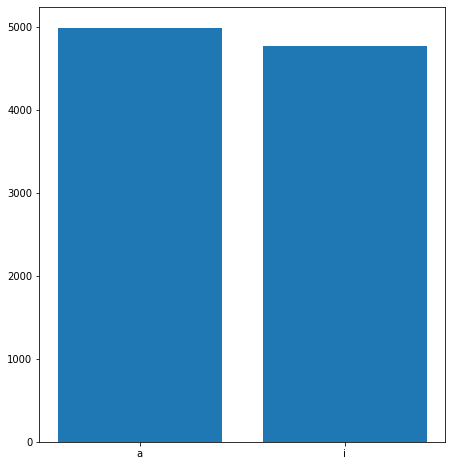

In [49]:
# Graph for Stopwords
top10_stopwords = sorted(stopwords_dict.items(), key=lambda x:x[1], reverse=True)[:10]
x0,y0 = zip(*top10_stopwords)

plt.figure(1, figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(x0,y0)

<BarContainer object of 10 artists>

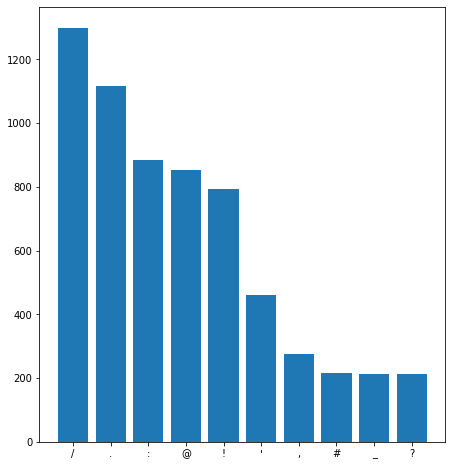

In [50]:
# Graph for punct
top10_punct = sorted(punc.items(), key=lambda x:x[1], reverse=True)[:10]
x0,y0 = zip(*top10_punct)

plt.figure(1, figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(x0,y0)

<BarContainer object of 10 artists>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 129318 (\N{FACE PALM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 127998 (\N{EMOJI MODIFIER FITZPATRICK TYPE-5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 129318 (\N{FACE

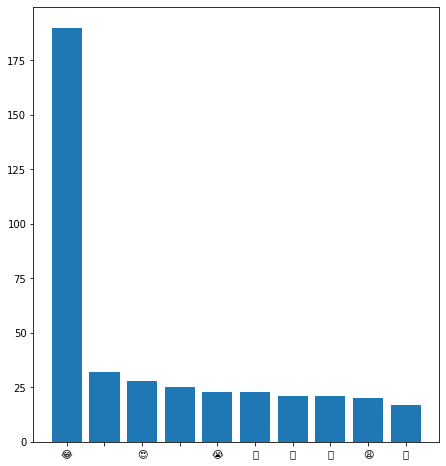

In [51]:
# Graph for Emojis
top10_emojis = sorted(emojis.items(), key=lambda x:x[1], reverse=True)[:10]
x0,y0 = zip(*top10_emojis)

plt.figure(1, figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(x0,y0)

## Tokenization

In [52]:
"""
Reference: Kabilesh, KabileshKabilesh 98466 gold badges2020 silver badges4646 bronze badges, TimTim 2, NickNick 3, sougata sahasougata saha4766 bronze badges, &amp; toshi456toshi45620311 silver badge77 bronze badges.(1965, September 1). Unable to remove some emojis from tweets in Python. Stack Overflow. Retrieved March 24, 2023, from https://stackoverflow.com/questions/53322870/unable-to-remove-some-emojis-from-tweets-in-python 
Function for emoji removal
"""
def remove_emoji(token):
  regrex_pattern = re.compile(pattern = "["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002500-\U00002BEF"  # chinese char
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642"
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"  # dingbats
          u"\u3030"
                            "]+", flags = re.UNICODE)
  return regrex_pattern.sub(r'', token)

In [63]:
def tokenize(docs, lemmatized=True, remove_stopword=True, remove_punct = True):
    
    tokenized_docs = []

    for doc in docs:
      doc = nlp(doc)
      doc_tokenized = []
      
      # Lemmatized
      for token in doc:
        if lemmatized:
          doc_tokenized.append(token.lemma_)
        else:
          doc_tokenized.append(token.text)

      # Removing Noises like @, links, # and emojis from the tweets
      temp_tokens = []
      for token in doc_tokenized:
        token = token.strip() #Removing empty tokens
        if token.startswith('@') and len(token) > 1:
          token = '@user'
        elif token.startswith('http'):
          token = 'http'
        elif token.startswith('#'):
          token = token.replace("#", "")
        else:
            token = remove_emoji(token)
        temp_tokens.append(token)
      doc_tokenized = temp_tokens
    
      # Remove Stopwords from the tokens
      if remove_stopword:
        temp_tokens = []
        stopwords = spacy.lang.en.stop_words.STOP_WORDS
        for token in doc_tokenized:
          if token.lower() not in stopwords:
            temp_tokens.append(token.lower())
        doc_tokenized = temp_tokens

        #doc_tokenized = [token for token in doc_tokenized if str(token).lower() not in stopwords]

      # Removed Punc
      if remove_punct:
        doc_tokenized = " ".join([token for token in doc_tokenized])
        doc_tokenized = nlp(doc_tokenized)
        doc_tokenized = [token for token in doc_tokenized if not token.is_punct]

      tokenized_docs.append(doc_tokenized)

    return tokenized_docs

In [65]:
print(data_hatespeech["tweets"].iloc[0] + "\n")
print(f"lemmatized=True, remove_stopword=True, remove_punct = True:\n {tokenize(data_hatespeech['tweets'], lemmatized=True, remove_stopword=True, remove_punct = True)}\n")
tokenized_tweets = tokenize(data_hatespeech['tweets'], lemmatized=True, remove_stopword=True, remove_punct = True)
print(len(tokenized_tweets))

Alex Brosas another idiot #ALDUBKSGoesToUS  https://t.co/14G7hFwVQm

lemmatized=True, remove_stopword=True, remove_punct = True:
 [[alex, brosas, idiot,  , aldubksgoestous,  , http], [rt, @user, nancy, reagan, fucking,  , like, http], [rt, @user, nazi, death, gas, horrific, hitler, fear, use, http], [hate, er, chase, bitch, work, literally, evil], [rt, @user, hmu, u, tired, ur, boring, hoe, ur, bore], [rt, @user, sick, bitches, internet,    , http, g, @user, @user, @user,  , fblogger,  , fblchat, @user], [rt, @user, pineapple, belong, pizza, y', all, niggas, nasty], [shit, start, smoke, drink, bad, combo, probably, look, like, http], [rt, @user, april, fools, fuck,  , dope, feel, rigor, mortis, dummy,  , hiphop,  , boombap,  , goldenera, http], [niggas, talk, woman, wear, weave, sick, bitch, fro, ass], [god, fuck, pathetic, http], [worried, somebody, bein, ugly, bitch, ugly], [carlos, correa, gyalchester, walkup, music, bad, ass], [damn, dean, corbin, sleep, match, pre, boring, fuck], 

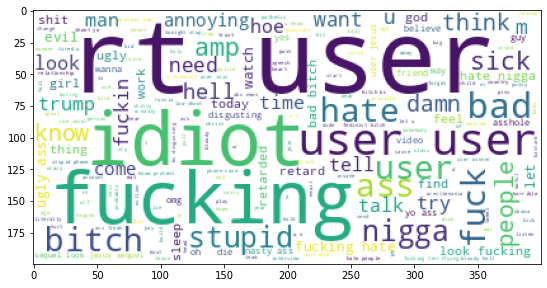

In [72]:
from wordcloud import WordCloud

all_words = []
for tokenized_tweet in tokenized_tweets:
  for word in tokenized_tweet:
    all_words.append(word.text)
    
word_cloud = WordCloud(background_color="white", max_font_size=80).generate(" ".join(all_words))
plt.figure(1, figsize=(20, 18))
plt.subplot(1,2,1)
plt.imshow(word_cloud)

## Normalization

In [73]:
# using dictionary comprehension for iteration
tokenized_tweets_dict = {idx : tokenized_tweets[idx] for idx in range(len(tokenized_tweets))}

# Find the count of each unique token and save the count as a dictionary, named word_dict, i.e., {world: 1, a: 1, ...}
from collections import Counter
for i, para in enumerate(tokenized_tweets_dict.values()):
  word_dict = dict(Counter(para))
  tokenized_tweets_dict[i] = word_dict

print(tokenized_tweets_dict)

{0: {alex: 1, brosas: 1, idiot: 1,  : 1, aldubksgoestous: 1,  : 1, http: 1}, 1: {rt: 1, @user: 1, nancy: 1, reagan: 1, fucking: 1,  : 1, like: 1, http: 1}, 2: {rt: 1, @user: 1, nazi: 1, death: 1, gas: 1, horrific: 1, hitler: 1, fear: 1, use: 1, http: 1}, 3: {hate: 1, er: 1, chase: 1, bitch: 1, work: 1, literally: 1, evil: 1}, 4: {rt: 1, @user: 1, hmu: 1, u: 1, tired: 1, ur: 1, boring: 1, hoe: 1, ur: 1, bore: 1}, 5: {rt: 1, @user: 1, sick: 1, bitches: 1, internet: 1,    : 1, http: 1, g: 1, @user: 1, @user: 1, @user: 1,  : 1, fblogger: 1,  : 1, fblchat: 1, @user: 1}, 6: {rt: 1, @user: 1, pineapple: 1, belong: 1, pizza: 1, y': 1, all: 1, niggas: 1, nasty: 1}, 7: {shit: 1, start: 1, smoke: 1, drink: 1, bad: 1, combo: 1, probably: 1, look: 1, like: 1, http: 1}, 8: {rt: 1, @user: 1, april: 1, fools: 1, fuck: 1,  : 1, dope: 1, feel: 1, rigor: 1, mortis: 1, dummy: 1,  : 1, hiphop: 1,  : 1, boombap: 1,  : 1, goldenera: 1, http: 1}, 9: {niggas: 1, talk: 1, woman: 1, wear: 1, weave: 1, sick: 1, b

In [74]:
# Pools the keys from all the word dictionaries to get a list of unique words, denoted as unique_words
unique_words = set()
for li in tokenized_tweets_dict.values():
  for word in li.keys():
    unique_words.add(word)
unique_words = list(unique_words)
print(unique_words)
print(len(unique_words))

[gh, 2, bryce, like, rt, grind, like, bad, fucking, b, look, idiot, people, check, look, @user, rock, dude, burnt, meekly, evil,  , well, wassup,  , marketing, rt, ka, fuckin, talk, rt, ugly, ride, travel, know, bitch, damn, world, ion,  , retard, idiot, like, hate, like, nigga, phone, fuck, woman, try, second, pulse, huh,  , mate, rt, stream, hammer, rt, fucking, hate, die, anon,  , believe, message, @user, hate,  , wanna, @user, rt, gon, fuck, rep, trump, nigga, mf, idiot, fucking, papaya, policy, grapple, http, bad, horrible, nap, report, @user, af, read, klavan, http, system, rt, http, ya, @user, @user, bad, stupid, day, bitch, bunch, unite, computer, boombap, @user, bukowski, http, people, http, gt;&gt;&gt, bitch,   ,  , believe, million, makeup,  , evil, nancy, brie, james, grow, @user, try, http, update, send, yes, everybody, boo, satin, fucking, ask, ugly, industrialization, shit, bed, obey, idiot, tired, bad, god, @user, 3k, n, ban, smh, http, http, blaze, oh, philosopher, rep

In [75]:
# Creates a numpy array, say dtm with a shape (# of tokenized_tweets_dict x # of unique words), and set the initial values to 0.
dtm = np.zeros((len(tokenized_tweets_dict.keys()), len(unique_words)))
dtm.shape

(1040, 9532)

In [76]:
# Fills cell dtm[i,j] with the count of the jth word in the ith row in tokenized_tweets_dict
for i, j in enumerate(dtm):
  for k in range(len(j)):
    if unique_words[k] in tokenized_tweets_dict[i]:
      j[k] = tokenized_tweets_dict[i][unique_words[k]]

dtm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
# Calculates the paragraph frequency for each word
k = np.where(dtm>0, 1, 0)
df = np.sum(k,axis=0)

# Normalizes the word count per paragraph
normalized_dtm = dtm / dtm.sum(axis=1).reshape((-1,1))

normalized_dtm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Sentiment Analysis

In [97]:
def compute_sentiment(tweets_tokens, pos, neg ):
    
    result = None
    
    set_pos = set(pos)
    set_neg = set(neg)

    def func(text):
      posi = 0
      nega = 0
      for i in text:
        if i in set_pos:
          posi += 1
        elif i in set_neg:
          nega += 1
      return (posi-nega)/(posi+nega) if (posi+nega) > 0 else 0 

    new = pd.DataFrame({"aae_tweets_tokens": tweets_tokens})
    new["aae_sentiment"] = new["aae_tweets_tokens"].apply(func)
    result = new[["aae_sentiment"]]

    return result

In [81]:
pos = pd.read_csv("/content/positive-words.txt", header = None)
pos.head()

,0
0,a+
1,abound
2,abounds
3,abundance
4,abundant


In [82]:
neg = pd.read_csv("/content/negative-words.txt", header = None)
neg.head()

,0
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [91]:
tweets_tokens = tokenize(data_hatespeech['tweets'], lemmatized=True, remove_stopword=True, remove_punct = True)

In [98]:
result = compute_sentiment(tweets_tokens, pos[0].values, neg[0].values)
result.head(500)

,aae_sentiment
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0
